In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
y = data['Outcome']
x = data.drop(['Outcome'], axis = 1)

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [7]:
len(y_train)      #trainset : 614 records testset : 154 records

614

In [8]:
diabetes_positive_mean = x_train[y_train == 1].mean()
diabetes_positive_stddev = x_train[y_train == 1].std()

diabetes_negative_mean = x_train[y_train == 0].mean()
diabetes_negative_stddev = x_train[y_train == 0].std()

In [9]:
from math import *

def gaussian_prob(x, avg, std_dev):
    
    return (exp(-0.5 *  ( ( (x - avg) / std_dev ) ** 2 ) ) / (sqrt(2 * pi) * std_dev))    #gaussian equation

In [10]:
def predictClass(row):
    
    diabetes_positive = len(x_train[y_train == 1])
    total_length = len(x_train)
    
    probability_diabetes = (diabetes_positive / total_length)
    probability_not_diabetes = 1 - probability_diabetes
    
    for i in range(0, len(row)):
        
        probability_diabetes *= gaussian_prob(row[i], diabetes_positive_mean[i], diabetes_positive_stddev[i])        
        probability_not_diabetes *= gaussian_prob(row[i], diabetes_negative_mean[i], diabetes_negative_stddev[i])    
    
    return [probability_diabetes, probability_not_diabetes]

In [11]:
class_predicitions_per_row = []

for row in np.array(x_test):
    
    class_predicitions_per_row.append(predictClass(row))

In [12]:
class_predicitions_per_row[0]

[8.858813335122498e-16, 2.8890489751678537e-18]

In [13]:
predictions = []

for pred in class_predicitions_per_row:
    
    if(pred[0] > pred[1]):
        
        predictions.append(1)

    else:
        
        predictions.append(0)

predictions[0]

1

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print(accuracy_score(np.array(y_test), np.array(predictions)))
print(confusion_matrix(np.array(y_test), np.array(predictions)))

0.7922077922077922
[[93 14]
 [18 29]]


In [15]:
f1_score(np.array(y_test), np.array(predictions))

0.6444444444444444

In [16]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(np.array(x_train), np.array(y_train))

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
confusion_matrix(np.array(y_test), model.predict(x_test))

array([[93, 14],
       [18, 29]])

In [18]:
accuracy_score(np.array(y_test), model.predict(x_test))

0.7922077922077922

In [19]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(np.array(x_train), np.array(y_train))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
confusion_matrix(np.array(y_test), model.predict(x_test))

array([[76, 31],
       [25, 22]])

In [21]:
accuracy_score(np.array(y_test), model.predict(x_test))

0.6363636363636364

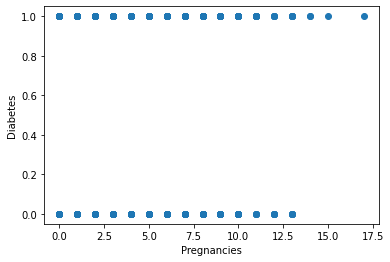

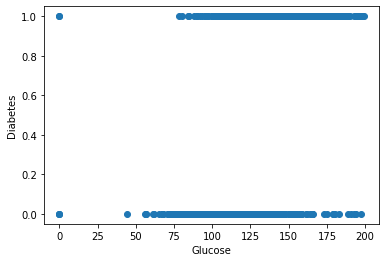

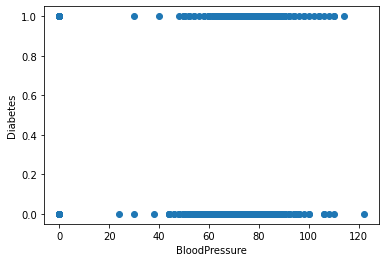

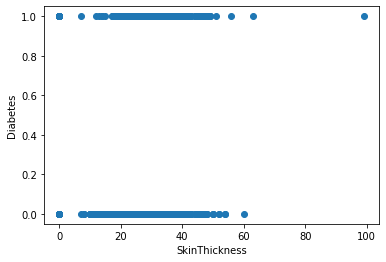

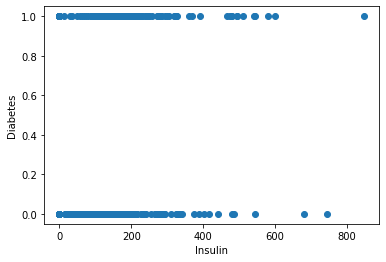

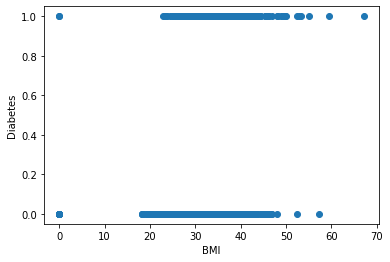

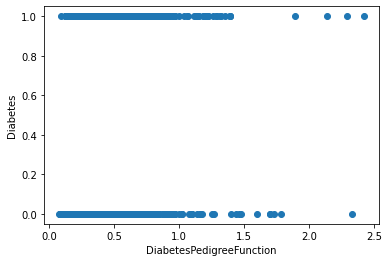

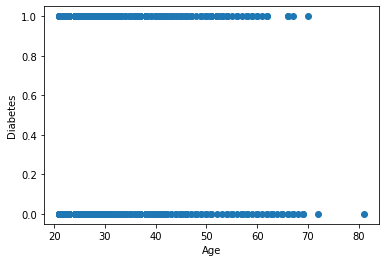

In [22]:
import matplotlib.pyplot as plt

for i in x.columns:
    
    plt.scatter(np.array(x[i]), np.array(y))
    plt.xlabel(i)
    plt.ylabel("Diabetes")
    
    plt.show()